**Final Project - Algotrade**

**Mentor:** 

Ofer Zevin

**Students:**

Naor Suban 

Elit Manes 

Iris Kronfeld 

Omer Tagger 


In [ ]:
#Install libraries
!pip install matplotlib
!pip install yfinance
!pip install seaborn
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing all the libraries
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Select stocks, start year and end year, stock number has no known limit
selected = ["SPY","IEI","LQD","QQQ"]
start_year = '2009-09-30'
end_year = '2023-05-07'
Num_porSimulation = 20000
V = 4

#Building the dataframe 
yf.pdr_override()
frame = {}
for stock in selected:
    data_var = pdr.get_data_yahoo(stock, start_year,end_year)['Adj Close']
    data_var.to_frame()
    frame.update({stock: data_var})

import pandas as pd
#Mathematical calculations, creation of 5000 portfolios,
table = pd.DataFrame(frame)
pd.DataFrame(frame).to_csv('Out.csv')
returns_daily = table.pct_change()


port_profolio_annual = []
port_gini_annual = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = Num_porSimulation                                    

#set random seed for reproduction's sake
np.random.seed(101)

#Mathematical calculations, creation of 5000 portfolios,
table = pd.DataFrame(frame)
pd.DataFrame(frame).to_csv('Out.csv')
returns_daily = table.pct_change()
for stock in returns_daily.keys():
  table[stock +'_change'] = returns_daily[stock]

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
 
    profolio = np.dot(returns_daily,weights)

    profolio_return = pd.DataFrame(profolio)
    rank = profolio_return.rank()
    rank_divided_N = rank/len(rank) # Rank/N
    one_sub_rank_divided_N = 1-rank_divided_N # 1-Rank/N
    one_sub_rank_divided_N_power_v_sub_one = one_sub_rank_divided_N ** (V-1) # (1-Rank/N)^(V-1)
    mue = profolio_return.mean().tolist()[0]
    x_avg = one_sub_rank_divided_N_power_v_sub_one.mean().tolist()[0]
    profolio_mue = profolio_return - mue
    rank_sub_x_avg =  one_sub_rank_divided_N_power_v_sub_one - x_avg
    profolio_mue_mult_rank_x_avg = profolio_mue * rank_sub_x_avg
    summary = profolio_mue_mult_rank_x_avg.sum().tolist()[0]/(len(rank)-1)
    gini_daily = summary*(-V)
    gini_annual = gini_daily * (254**0.5)
    profolio_annual = ((1+mue)**254)-1
    sharpe = profolio_annual/gini_annual
    sharpe_ratio.append(sharpe)
    port_profolio_annual.append(profolio_annual*100)
    port_gini_annual.append(gini_annual*100)
    stock_weights.append(weights)


    
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Profolio_annual': port_profolio_annual,
             'Gini': port_gini_annual,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Profolio_annual', 'Gini', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(gini_annual)

0.059731036431448684


<ipython-input-5-9651ae55995a>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')
<ipython-input-5-9651ae55995a>:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


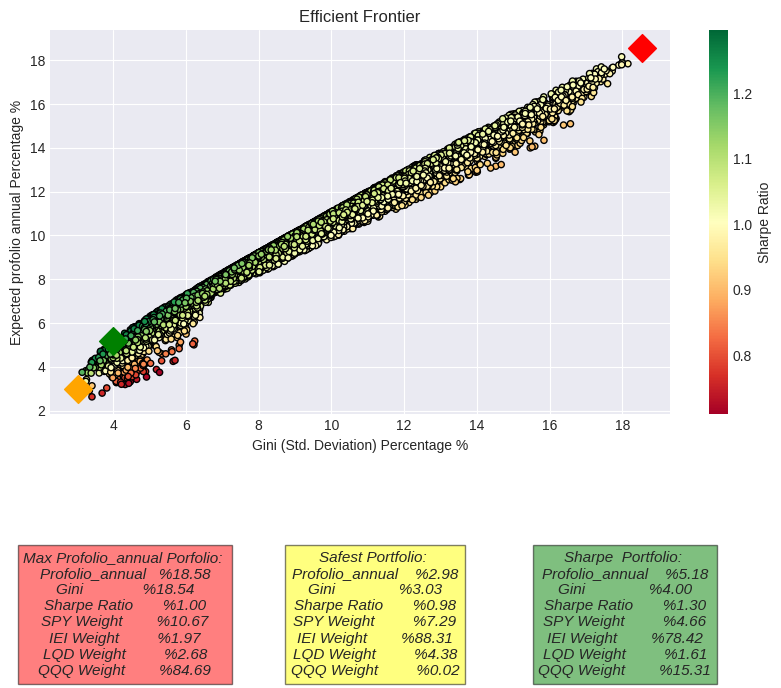

In [ ]:

# plot frontier, max sharpe & min Gini values with a scatterplot
# find min Gini & max sharpe values in the dataframe (df)
min_gini =df['Gini'].min()
max_sharpe = df['Sharpe Ratio'].max()
max_profolio_annual = df['Profolio_annual'].max()
max_gini = df['Gini'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Gini'] == min_gini]
max_profolios_annual = df.loc[df['Profolio_annual'] == max_profolio_annual]
max_ginis = df.loc[df['Gini'] == max_gini]


# plot frontier, max sharpe & min Gini values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Gini', y='Profolio_annual', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Gini'], y=sharpe_portfolio['Profolio_annual'], c='green', marker='D', s=200)
plt.scatter(x=min_variance_port['Gini'], y=min_variance_port['Profolio_annual'], c='orange', marker='D', s=200 )
plt.scatter(x=max_ginis['Gini'], y=max_profolios_annual['Profolio_annual'], c='red', marker='D', s=200 )
plt.style.use('seaborn-dark')

plt.xlabel('Gini (Std. Deviation) Percentage %')
plt.ylabel('Expected profolio annual Percentage %')
plt.title('Efficient Frontier')
plt.subplots_adjust(bottom=0.4)

# ------------------ Pritning 3 optimal Protfolios -----------------------
#Setting max_X, max_Y to act as relative border for window size

red_num = df.index[df["Profolio_annual"] == max_profolio_annual]
yellow_num = df.index[df['Gini'] == min_gini]
green_num = df.index[df['Sharpe Ratio'] == max_sharpe]
multseries = pd.Series([1,1,1]+[100 for stock in selected], index=['Profolio_annual', 'Gini', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected])
with pd.option_context('display.float_format', '%{:,.2f}'.format):
    plt.figtext(0.2, 0.15, "Max Profolio_annual Porfolio: \n" + df.loc[red_num[0]].multiply(multseries).to_string(),bbox=dict(facecolor='red', alpha=0.5), fontsize=11, style='oblique',ha='center', va='center', wrap=True)
    plt.figtext(0.45, 0.15, "Safest Portfolio: \n" + df.loc[yellow_num[0]].multiply(multseries).to_string(),bbox=dict(facecolor='yellow', alpha=0.5), fontsize=11, style='oblique', ha='center', va='center', wrap=True)
    plt.figtext(0.7, 0.15, "Sharpe  Portfolio: \n" + df.loc[green_num[0]].multiply(multseries).to_string(),bbox=dict(facecolor='green', alpha=0.5), fontsize=11, style='oblique', ha='center', va='center', wrap=True)
plt.show()